## Visualizing a Decision Tree

#### There are many types of classifiers
- Artificial Neural Network
- Support Vector Machine

Iris is a classic machine learning problem.
In it, you want to identify what type of flower
you have based on different measurements,
like the length and width of the petal.
The data set includes three different types of flowers.
They're all species of iris-- setosa, versicolor,
and virginica.

#### Goal

1. Import dataset.
2. Train a classifier.
3. Predict label for new flower.
4. Visualize the tree.

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
import pandas as pd
import numpy as np

### Import Dataset

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(np.concatenate([iris.data,iris.target.reshape(-1,1)],axis=1),columns=np.append(np.array(iris.feature_names),'target'))

In [3]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


### Train a Classifier

#### Testing Data

- Examples used to "test" the classifier's accuracy.
- Not part of the training data.

Just like in programming, testing is a very important part of ML.

In [4]:
test_idx = [0,50,100]

In [5]:
# training data
train_target = np.delete(iris.target, test_idx)
train_data = np.delete(iris.data, test_idx, axis=0)

In [6]:
# testing data
test_target = iris.target[test_idx]
test_data = iris.data[test_idx]

In [7]:
clf = tree.DecisionTreeClassifier()
clf.fit(train_data,train_target)

DecisionTreeClassifier()

### Predict Label for New Flower

In [8]:
test_target

array([0, 1, 2])

In [9]:
clf.predict(test_data)

array([0, 1, 2])

### Visualize the Tree

```sh
$ sudo apt-get install graphviz
```

In [10]:
import graphviz

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 147\nvalue = [49, 49, 49]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 49\nvalue = [49, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 98\nvalue = [0, 49, 49]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.171\nsamples = 53\nvalue = [0, 48, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.042\nsamples = 47\nvalue = [0, 46, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 46\nvalue = [0, 46, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.523076

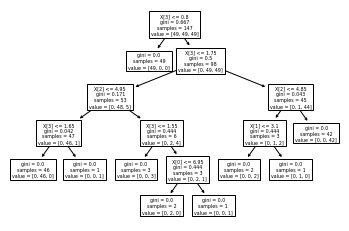

In [11]:
tree.plot_tree(clf)

Below is an example graphviz export of the above tree trained on the entire iris dataset; the results are saved in an output file iris.pdf:

In [12]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

The export_graphviz exporter also supports a variety of aesthetic options, including coloring nodes by their class (or value for regression) and using explicit variable and class names if desired. Jupyter notebooks also render these plots inline automatically:



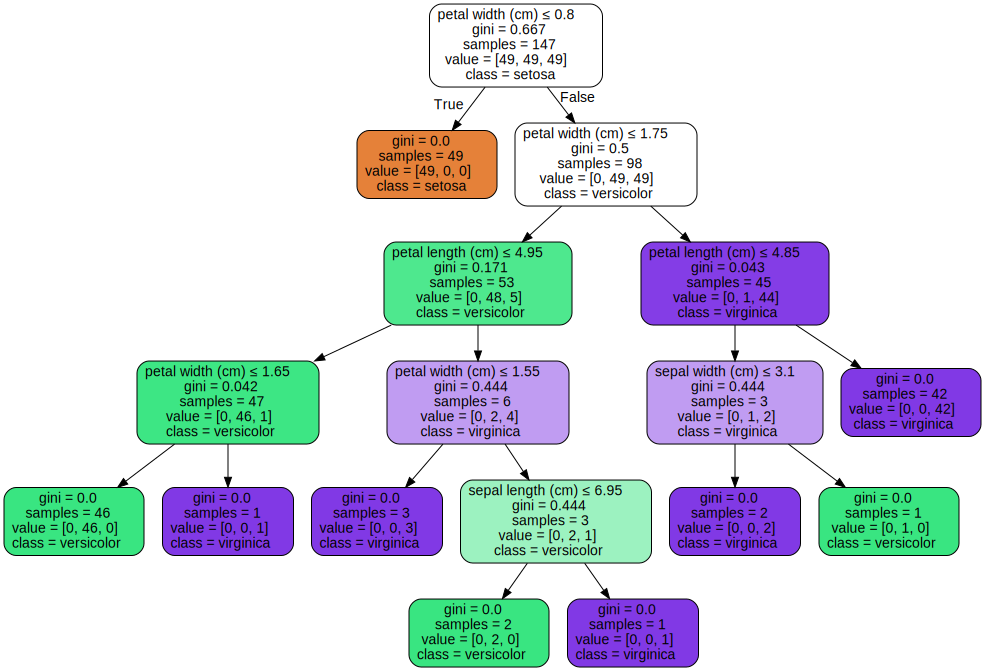

In [13]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

Every question the tree asks must be about one
of your features.
That means the better your features are, the better a tree
you can build.

In [14]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
pd.DataFrame(np.concatenate([test_data,test_target.reshape(-1,1)],axis=1))

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0.0
1,7.0,3.2,4.7,1.4,1.0
2,6.3,3.3,6.0,2.5,2.0
